In [63]:
import pandas as pd
import numpy as np
import nltk
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import plotly 
import plotly.plotly as py
import plotly.graph_objs as go
import math

%matplotlib inline

# my functions
import helpers.data_mining_helpers as dmh
import helpers.text_analysis as ta

In [64]:
#  read dataset
file=open("sentiment labelled sentences/yelp_labelled.txt", "r")
yelplines = file.readlines()
file=open("sentiment labelled sentences/amazon_cells_labelled.txt", "r")
amazonlines = file.readlines()
file=open("sentiment labelled sentences/imdb_labelled.txt", "r", encoding = 'utf8')
imdblines = file.readlines()

In [65]:
alldata=yelplines+amazonlines+imdblines

In [66]:
# put all data into pandas dataframe
labels=['text', 'score']
X = pd.DataFrame.from_records(dmh.format_rows(alldata), columns= labels)
# print (X)

In [67]:
X[0:11][["text","score"]]

,text,score
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,1


In [68]:
# exercise 0
X.iloc[::10, :][0:10]

,text,score
0,Wow... Loved this place.,1
10,Service was very prompt.,1
20,The Burrittos Blah!,0
30,"Also there are combos like a burger, fries, an...",1
40,The shrimp tender and moist.,1
50,We ordered the duck rare and it was pink and t...,1
60,At least think to refill my water before I str...,0
70,"The deal included 5 tastings and 2 drinks, and...",1
80,Coming here is like experiencing an underwhelm...,0
90,"In summary, this was a largely disappointing d...",0


In [69]:
# get score which is 1
X.loc[X['score'] == "1"]

,text,score
0,Wow... Loved this place.,1
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
8,The fries were great too.,1
9,A great touch.,1
10,Service was very prompt.,1
13,"I tried the Cape Cod ravoli, chicken,with cran...",1
16,Highly recommended.,1
21,"The food, amazing.",1
22,Service is also cute.,1


In [70]:
# get score which is 0
X.query('score == "0"')

,text,score
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
11,Would not go back.,0
12,The cashier had no care what so ever on what I...,0
14,I was disgusted because I was pretty sure that...,0
15,I was shocked because no signs indicate cash o...,0
17,Waitress was a little slow in service.,0


In [71]:
# missing values
X.isnull()

,text,score
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [72]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

text     (The amoung of missing records is: , 0)
score    (The amoung of missing records is: , 0)
dtype: object

In [73]:
# exercise 1
# check missing value each record
X.isnull().apply(lambda x: dmh.check_missing_values(x),axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
5       (The amoung of missing records is: , 0)
6       (The amoung of missing records is: , 0)
7       (The amoung of missing records is: , 0)
8       (The amoung of missing records is: , 0)
9       (The amoung of missing records is: , 0)
10      (The amoung of missing records is: , 0)
11      (The amoung of missing records is: , 0)
12      (The amoung of missing records is: , 0)
13      (The amoung of missing records is: , 0)
14      (The amoung of missing records is: , 0)
15      (The amoung of missing records is: , 0)
16      (The amoung of missing records is: , 0)
17      (The amoung of missing records is: , 0)
18      (The amoung of missing records is: , 0)
19      (The amoung of missing records is: , 0)
20      (The amoung of missing records i

In [74]:
dummy_series = pd.Series(["dummy_record1111"], index=["text"])

In [75]:
X = X.append(dummy_series, ignore_index=True)

In [76]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

text     (The amoung of missing records is: , 0)
score    (The amoung of missing records is: , 1)
dtype: object

In [77]:
X.dropna(inplace=True)

In [78]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

text     (The amoung of missing records is: , 0)
score    (The amoung of missing records is: , 0)
dtype: object

In [79]:
# duplicate values
X.duplicated()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
2970    False
2971    False
2972    False
2973    False
2974    False
2975    False
2976    False
2977    False
2978    False
2979    False
2980    False
2981    False
2982    False
2983    False
2984    False
2985    False
2986    False
2987    False
2988    False
2989    False
2990    False
2991    False
2992    False
2993    False
2994    False
2995    False
2996    False
2997    False
2998    False
2999    False
Length: 3000, dtype: bool

In [80]:
sum(X.duplicated())

18

In [81]:
sum(X.duplicated('text'))

18

In [82]:
X.drop_duplicates(keep=False, inplace=True)

In [83]:
len(X)

2964

In [84]:
#sample
X_sample = X.sample(n=1000)

In [85]:
len(X_sample)

1000

In [86]:
X_sample[0:4]

,text,score
1271,Worked perfectly!,1
710,"That said, our mouths and bellies were still q...",1
1362,"It is light, easy to use, and has very clear r...",1
1712,Poor quality.,0


In [87]:
X_score_counts = ta.get_tokens_and_frequency(list(X.score))
X_sample_score_counts = ta.get_tokens_and_frequency(list(X_sample.score))

In [88]:
plotly.tools.set_credentials_file(username='rocker915', api_key='IXl678UHkVxjhyoTVo71')

In [89]:
py.iplot(ta.plot_word_frequency(X_score_counts, "Score distribution"))

In [90]:
py.iplot(ta.plot_word_frequency(X_sample_score_counts, "Score distribution"))

In [91]:
# exercise 2
# compare 3 datasets
A = pd.DataFrame.from_records(dmh.format_rows(yelplines), columns= labels)
B = pd.DataFrame.from_records(dmh.format_rows(amazonlines), columns= labels)
C = pd.DataFrame.from_records(dmh.format_rows(imdblines), columns= labels)

A_score_counts = ta.get_tokens_and_frequency(list(A.score))
B_score_counts = ta.get_tokens_and_frequency(list(B.score))
C_score_counts = ta.get_tokens_and_frequency(list(C.score))

trace1 = {
    "x": list(A_score_counts[0]),
    "y": list(A_score_counts[1]),
    "type": "bar",
    "name": "yelp"
}
trace2 = {
    "x": list(B_score_counts[0]),
    "y": list(B_score_counts[1]),
    "type": "bar",
    "name": "amazon"
}
trace3 = {
    "x": list(C_score_counts[0]),
    "y": list(C_score_counts[1]),
    "type": "bar",
    "name": "imdb"
}

data = go.Data([trace1,trace2,trace3])

layout = go.Layout(
    barmode='group'
)

fig = go.Figure(data=data, layout=layout)

In [92]:
py.iplot(fig)

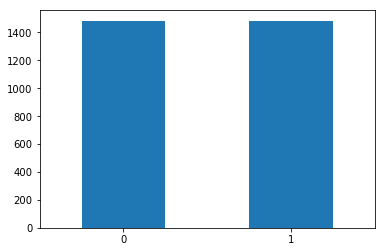

In [93]:
# matplotlib
X.score.value_counts().plot(kind="bar", rot=0)

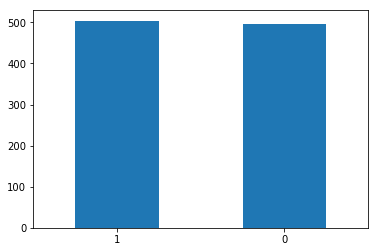

In [94]:
X_sample.score.value_counts().plot(kind="bar", rot=0)

In [95]:
# feature creation
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))
X[0:4]["unigrams"]

0                    [Wow, ..., Loved, this, place, .]
1                            [Crust, is, not, good, .]
2    [Not, tasty, and, the, texture, was, just, nas...
3    [Stopped, by, during, the, late, May, bank, ho...
Name: unigrams, dtype: object

In [96]:
list(X[0:1]['unigrams'])

[['Wow', '...', 'Loved', 'this', 'place', '.']]

In [97]:
# feature subset selection
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

In [98]:
analyze = count_vect.build_analyzer()
analyze(" ".join(list(X[4:5].text)))

['the',
 'selection',
 'on',
 'the',
 'menu',
 'was',
 'great',
 'and',
 'so',
 'were',
 'the',
 'prices']

In [99]:
" ".join(list(X[4:5].text))

'The selection on the menu was great and so were the prices.'

In [100]:
# matrix shape
X_counts.shape

(2964, 5153)

In [101]:
# obtain the feature names of the vectorizer
count_vect.get_feature_names()[0:10]

['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17']

In [102]:
X_counts[0:5,0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [103]:
count_vect.transform(['Something completely new.']).toarray()

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [104]:
count_vect.transform(['00 Something completely new.']).toarray()

array([[1, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [105]:
# exercise 3
# 100 sample of terms
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:100]]
plot_x

['term_00',
 'term_10',
 'term_100',
 'term_11',
 'term_12',
 'term_13',
 'term_15',
 'term_15g',
 'term_15pm',
 'term_17',
 'term_18',
 'term_18th',
 'term_1928',
 'term_1947',
 'term_1948',
 'term_1949',
 'term_1971',
 'term_1973',
 'term_1979',
 'term_1980',
 'term_1986',
 'term_1995',
 'term_1998',
 'term_20',
 'term_2000',
 'term_2005',
 'term_2006',
 'term_2007',
 'term_20th',
 'term_2160',
 'term_23',
 'term_24',
 'term_25',
 'term_2mp',
 'term_30',
 'term_30s',
 'term_325',
 'term_35',
 'term_350',
 'term_375',
 'term_3o',
 'term_40',
 'term_40min',
 'term_42',
 'term_44',
 'term_45',
 'term_4s',
 'term_4ths',
 'term_50',
 'term_5020',
 'term_510',
 'term_5320',
 'term_54',
 'term_5lb',
 'term_680',
 'term_70',
 'term_70000',
 'term_700w',
 'term_70s',
 'term_80',
 'term_80s',
 'term_8125',
 'term_85',
 'term_8525',
 'term_8530',
 'term_8pm',
 'term_90',
 'term_95',
 'term_99',
 'term_aailiyah',
 'term_abandoned',
 'term_abhor',
 'term_ability',
 'term_able',
 'term_abound',
 '

In [106]:
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:100]]

In [107]:
plot_z = X_counts[0:100, 0:100].toarray()

In [108]:
# to plot
py.iplot(ta.plot_heat_map(plot_x, plot_y, plot_z))

In [109]:
# Dimensionality Reduction
from sklearn.decomposition import PCA
X_reduced = PCA(n_components=3).fit_transform(X_counts.toarray())
X_reduced.shape

(2964, 3)

In [110]:
trace1 = ta.get_trace(X_reduced, X["score"], "0", "rgb(71,233,163)")
trace2 = ta.get_trace(X_reduced, X["score"], "1", "rgb(52,133,252)")

In [111]:
data = [trace1, trace2]

In [112]:
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='simple-3d-scatter')

In [113]:
# Atrribute Transformation / Aggregation
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

In [114]:
term_frequencies[0]

array([1], dtype=int64)

In [115]:
py.iplot(ta.plot_word_frequency([count_vect.get_feature_names(), term_frequencies], "Term Frequency Distribution"))

In [116]:
# exercise 4 + 5
# choose Top 200 sample by frequency and visualize and sort x-axis by frequency
n=count_vect.get_feature_names()
t=term_frequencies
t, n = zip(*sorted(zip(t, n), reverse=True))
n200=n[:200]
t200=t[:200]
#t200, n200 = zip(*sorted(zip(t200, n200), reverse=True))
py.iplot(ta.plot_word_frequency([n200,t200], "Term Frequency Distribution"))

In [117]:
term_frequencies_log = [math.log(i) for i in term_frequencies]

In [118]:
py.iplot(ta.plot_word_frequency([count_vect.get_feature_names(), term_frequencies_log], "Term Frequency Distribution"))

In [119]:
# Discretization and Binarization
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()

In [120]:
mlb.fit(X.score)

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [121]:
mlb.classes_

array(['0', '1'],
      dtype='<U1')

In [122]:
X['bin_score'] = mlb.transform(X['score']).tolist()

In [123]:
X[0:9]

,text,score,unigrams,bin_score
0,Wow... Loved this place.,1,"[Wow, ..., Loved, this, place, .]",[1]
1,Crust is not good.,0,"[Crust, is, not, good, .]",[0]
2,Not tasty and the texture was just nasty.,0,"[Not, tasty, and, the, texture, was, just, nas...",[0]
3,Stopped by during the late May bank holiday of...,1,"[Stopped, by, during, the, late, May, bank, ho...",[1]
4,The selection on the menu was great and so wer...,1,"[The, selection, on, the, menu, was, great, an...",[1]
5,Now I am getting angry and I want my damn pho.,0,"[Now, I, am, getting, angry, and, I, want, my,...",[0]
6,Honeslty it didn't taste THAT fresh.),0,"[Honeslty, it, did, n't, taste, THAT, fresh, ....",[0]
7,The potatoes were like rubber and you could te...,0,"[The, potatoes, were, like, rubber, and, you, ...",[0]
8,The fries were great too.,1,"[The, fries, were, great, too, .]",[1]
